## Energy potential-dependence wavelength shifts

In [149]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [150]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values ALL.xlsx")

#List of Nave with the potentials values
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Characterization\Third signature\Data\Nave Fe I list potential.xlsx")

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

In [151]:
# Take the energy potential values from the nave list
#Convert the wavelength in A cause its in cm^-1 
raw_lambda['Wave A'] = round((10**8)/raw_lambda['Wave (cm)'],4)
raw_lambda = raw_lambda.sort_values('Wave A', ascending=True, na_position='first')
raw_lambda = raw_lambda[raw_lambda['Wave A'].between(4000,23000,inclusive='right')] #Separate the range for use
raw_lambda = raw_lambda[raw_lambda['Quality']=='A'].drop(['Wave (cm)'],axis=1).reset_index(drop=True)
raw_lambda

,Quality,Lower potential level,Higher potential level,Wave A
0,A,2.990,6.089,4001.5883
1,A,2.176,5.273,4002.7931
2,A,3.237,6.331,4005.9597
3,A,3.017,6.112,4006.1108
4,A,1.557,4.652,4006.3743
...,...,...,...,...
3280,A,5.099,5.642,22838.5953
3281,A,5.828,6.370,22852.1702
3282,A,5.839,6.380,22888.7529
3283,A,5.334,5.874,22962.2707


In [152]:
# Take the energy excitation values for the lines from all ranges
Lower_potential = []
Higher_potential = []

for i in range(len(ALL_data)):
    data = raw_lambda[raw_lambda['Wave A'] == ALL_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_ALL = pd.DataFrame({'Lower potential' :   Lower_potential,
                                'Higher potential': Higher_potential,
                                'Velocity' : ALL_data['Velocity'],
                                'Wave A': ALL_data['Observed wavelength'],
                                'Line Depth': ALL_data['Line Depth']})

Energy_data_ALL

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-367,4060.8637,0.680344
1,2.176,5.273,-213,4068.4255,0.790107
2,3.237,6.331,-324,4080.9941,0.785819
3,3.017,6.112,-185,4086.1634,0.779078
4,1.557,4.652,-384,4088.2510,0.711281
...,...,...,...,...,...
766,3.283,5.410,-499,17165.8042,0.248327
767,5.099,7.226,-549,17209.0074,0.273511
768,2.608,4.733,-539,17307.0500,0.299686
769,4.913,7.037,-598,17315.5846,0.071818


In [153]:
# Take the energy excitation values for the lines
Lower_potential = []
Higher_potential = []

for i in range(len(SPA_data)):
    data = raw_lambda[raw_lambda['Wave A'] == SPA_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_SPA = pd.DataFrame({'Lower potential' :   Lower_potential,
                                'Higher potential': Higher_potential,
                                'Velocity' : SPA_data['Velocity'],
                                'Wave A': SPA_data['Observed wavelength'],
                                'Line Depth': SPA_data['Line Depth']})

Energy_data_SPA

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-212,4202.1137,0.879739
1,2.176,5.273,-483,4203.9391,0.748713
2,3.237,6.331,-355,4206.7272,0.830354
3,3.017,6.112,-298,4208.3170,0.888042
4,1.557,4.652,-156,4209.7963,0.875357
...,...,...,...,...,...
473,3.694,6.134,-322,7915.0519,0.399878
474,3.267,5.706,-316,7943.2820,0.353090
475,0.958,3.396,-37,7948.0484,0.646317
476,4.256,6.691,-347,7957.1302,0.070795


In [154]:
# Take the energy excitation values for the lines
Lower_potential = []
Higher_potential = []

for i in range(len(VIS_data)):
    data = raw_lambda[raw_lambda['Wave A'] == VIS_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data_VIS = pd.DataFrame({'Lower potential' :   Lower_potential,
                                'Higher potential': Higher_potential,
                                'Velocity' : VIS_data['Velocity'],
                                'Wave A': VIS_data['Observed wavelength'],
                                'Line Depth': VIS_data['Line Depth']})

Energy_data_VIS

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-469,4203.9393,0.638575
1,2.176,5.273,-391,4206.7267,0.740583
2,3.237,6.331,-305,4208.3169,0.785466
3,3.017,6.112,-284,4209.7945,0.789629
4,1.557,4.652,-263,4214.8395,0.802715
...,...,...,...,...,...
480,3.984,6.415,-131,7939.3372,0.587679
481,0.990,3.417,-391,7943.2800,0.295492
482,1.557,3.984,-131,7948.0459,0.580112
483,4.301,6.727,-366,7957.1297,0.054256


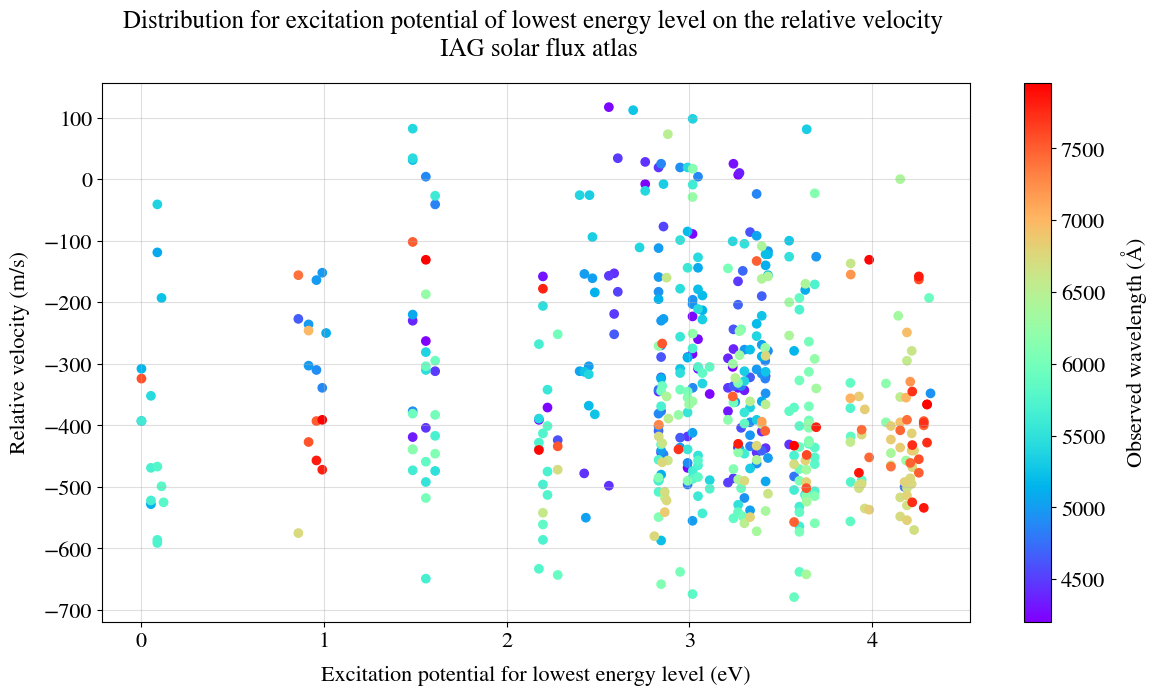

In [155]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(Energy_data_VIS['Lower potential'],Energy_data_VIS['Velocity'],c=Energy_data_VIS['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Distribution for excitation potential of lowest energy level on the relative velocity \n IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Excitation potential for lowest energy level (eV)',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('Velocity lower potential_VIS')

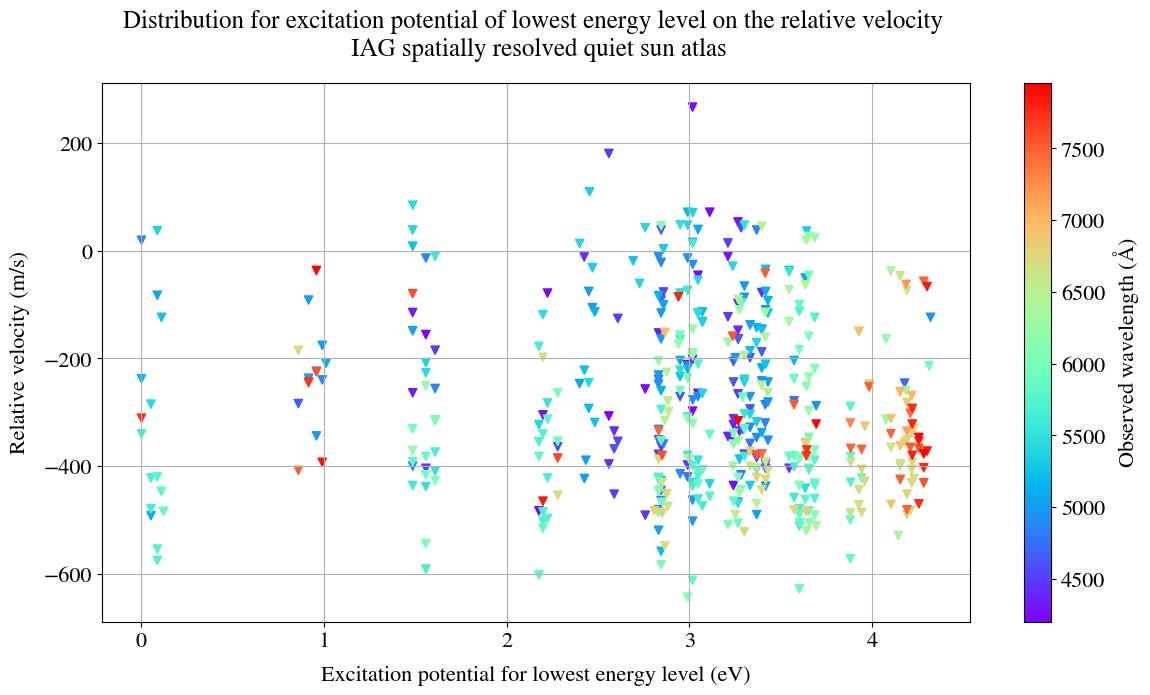

In [156]:
fig2, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(Energy_data_SPA['Lower potential'],Energy_data_SPA['Velocity'],c=Energy_data_SPA['Wave A'],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$')

ax.set_title('Distribution for excitation potential of lowest energy level on the relative velocity \n IAG spatially resolved quiet sun atlas', pad=20)
ax.set_xlabel(r'Excitation potential for lowest energy level (eV)',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid()

# fig2.savefig('Velocity lower potential_SPA')

### Fixing velocity

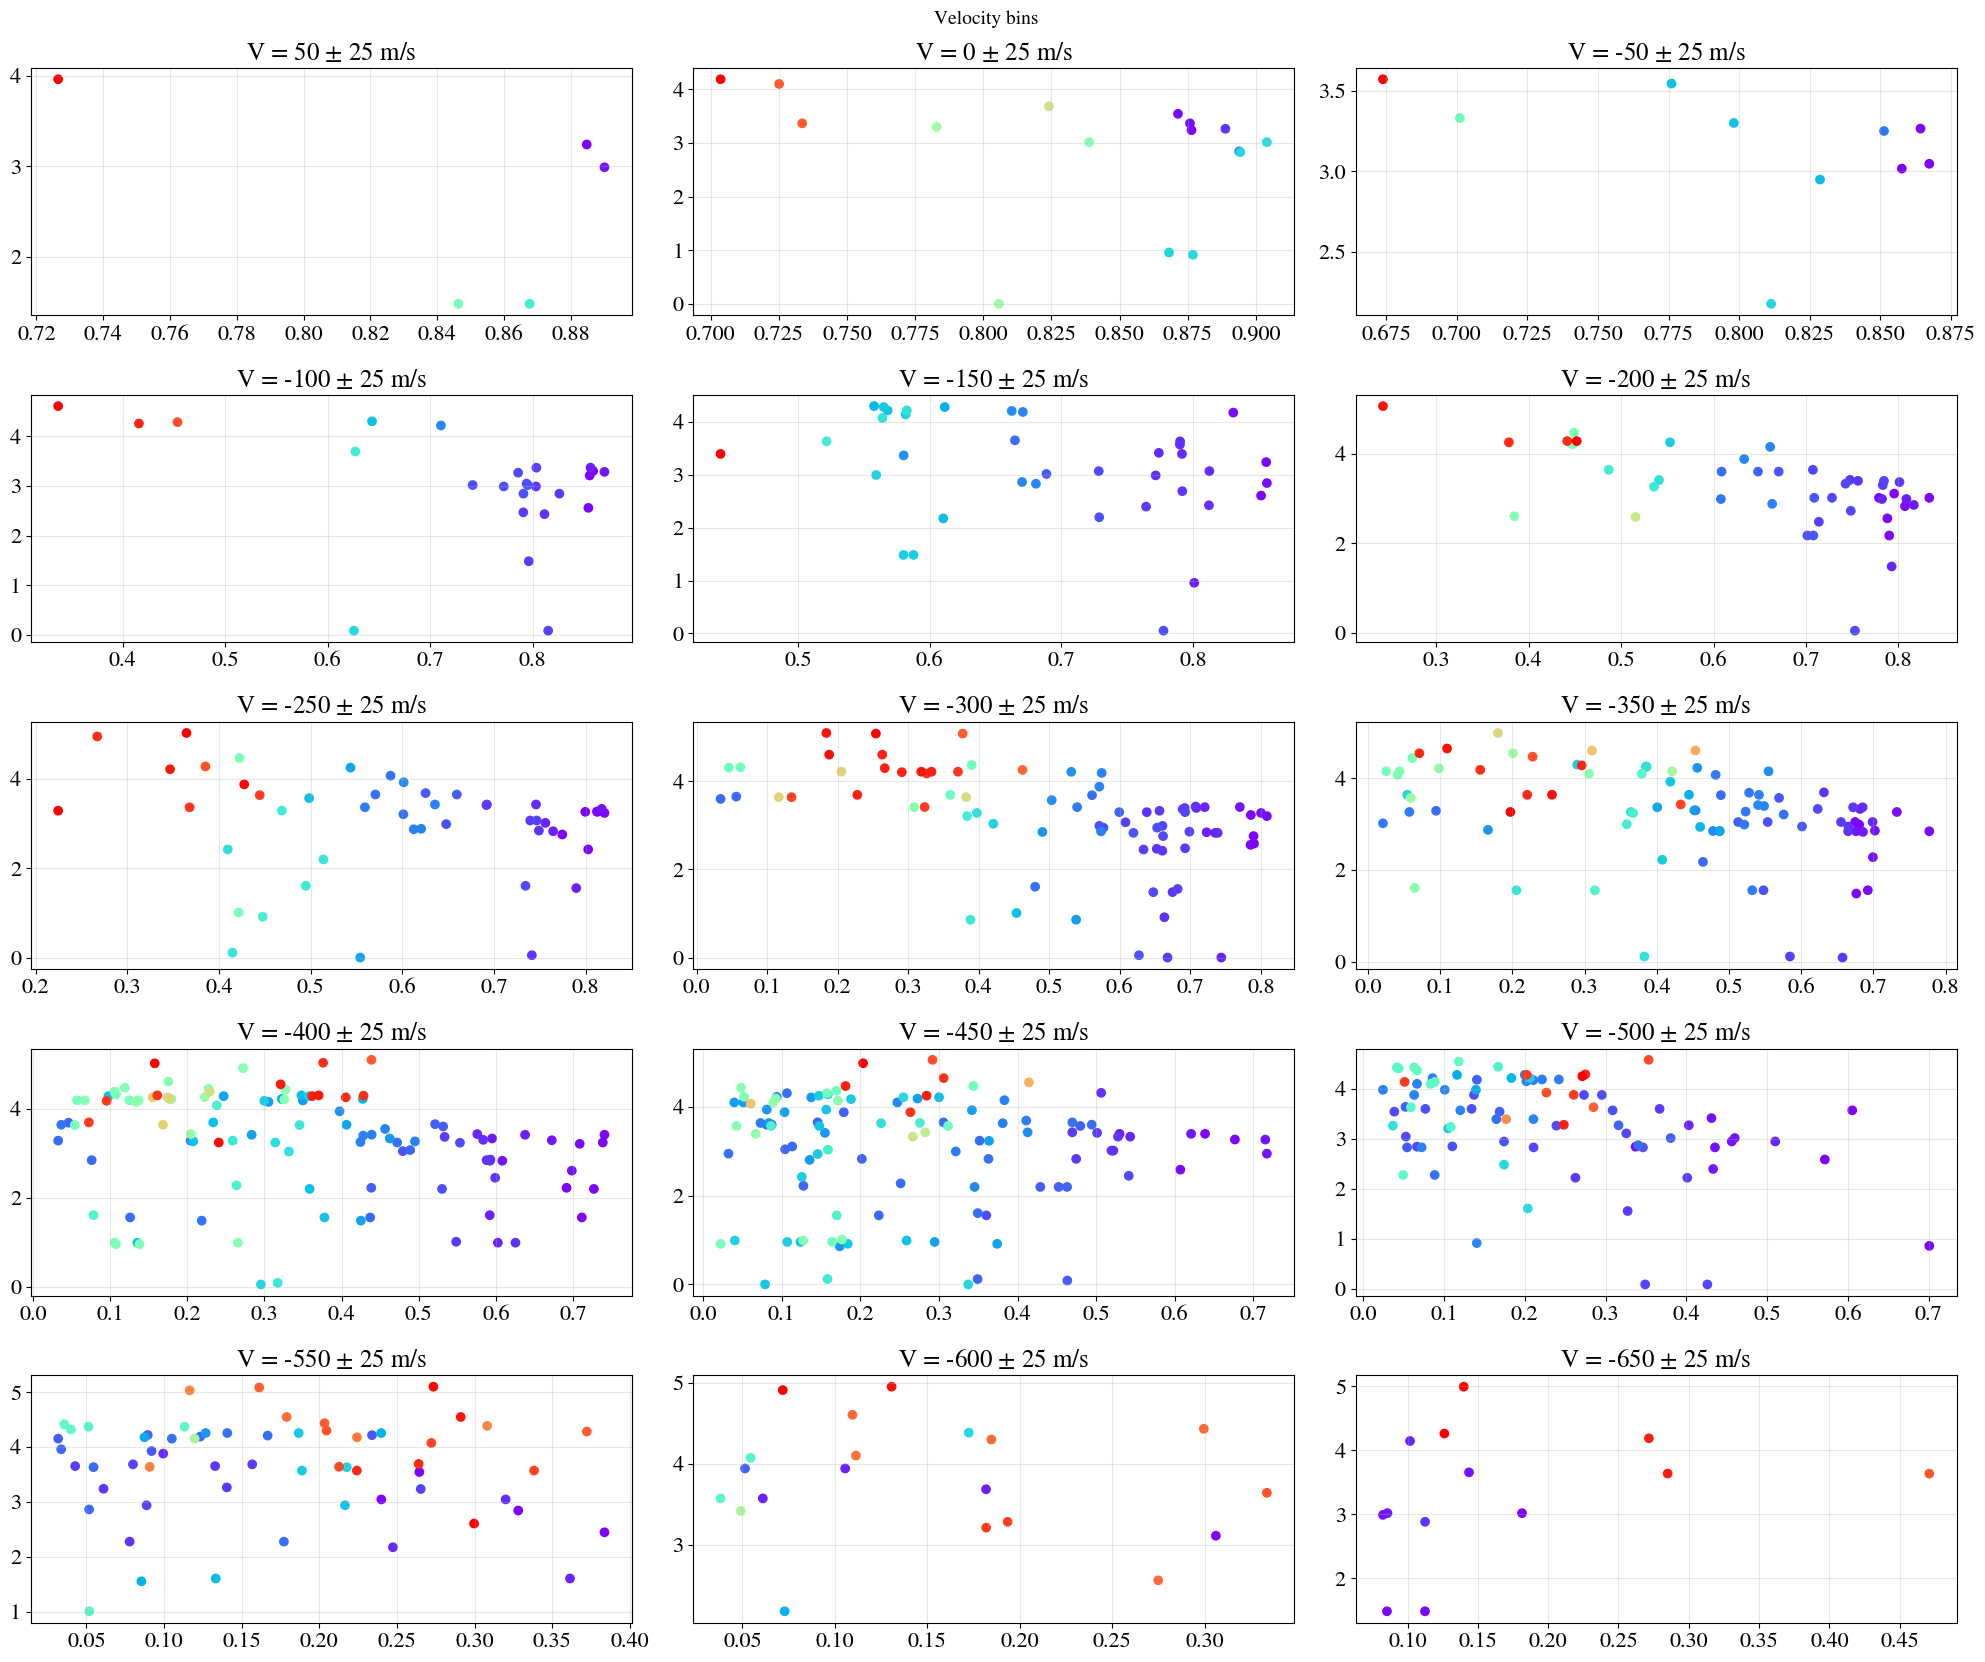

In [157]:
#Organize the dataframe wtih ascending velocities
listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS.append(Energy_data_ALL[Energy_data_ALL['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Line Depth'],velocity_VIS[i]['Lower potential'],c=velocity_VIS[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

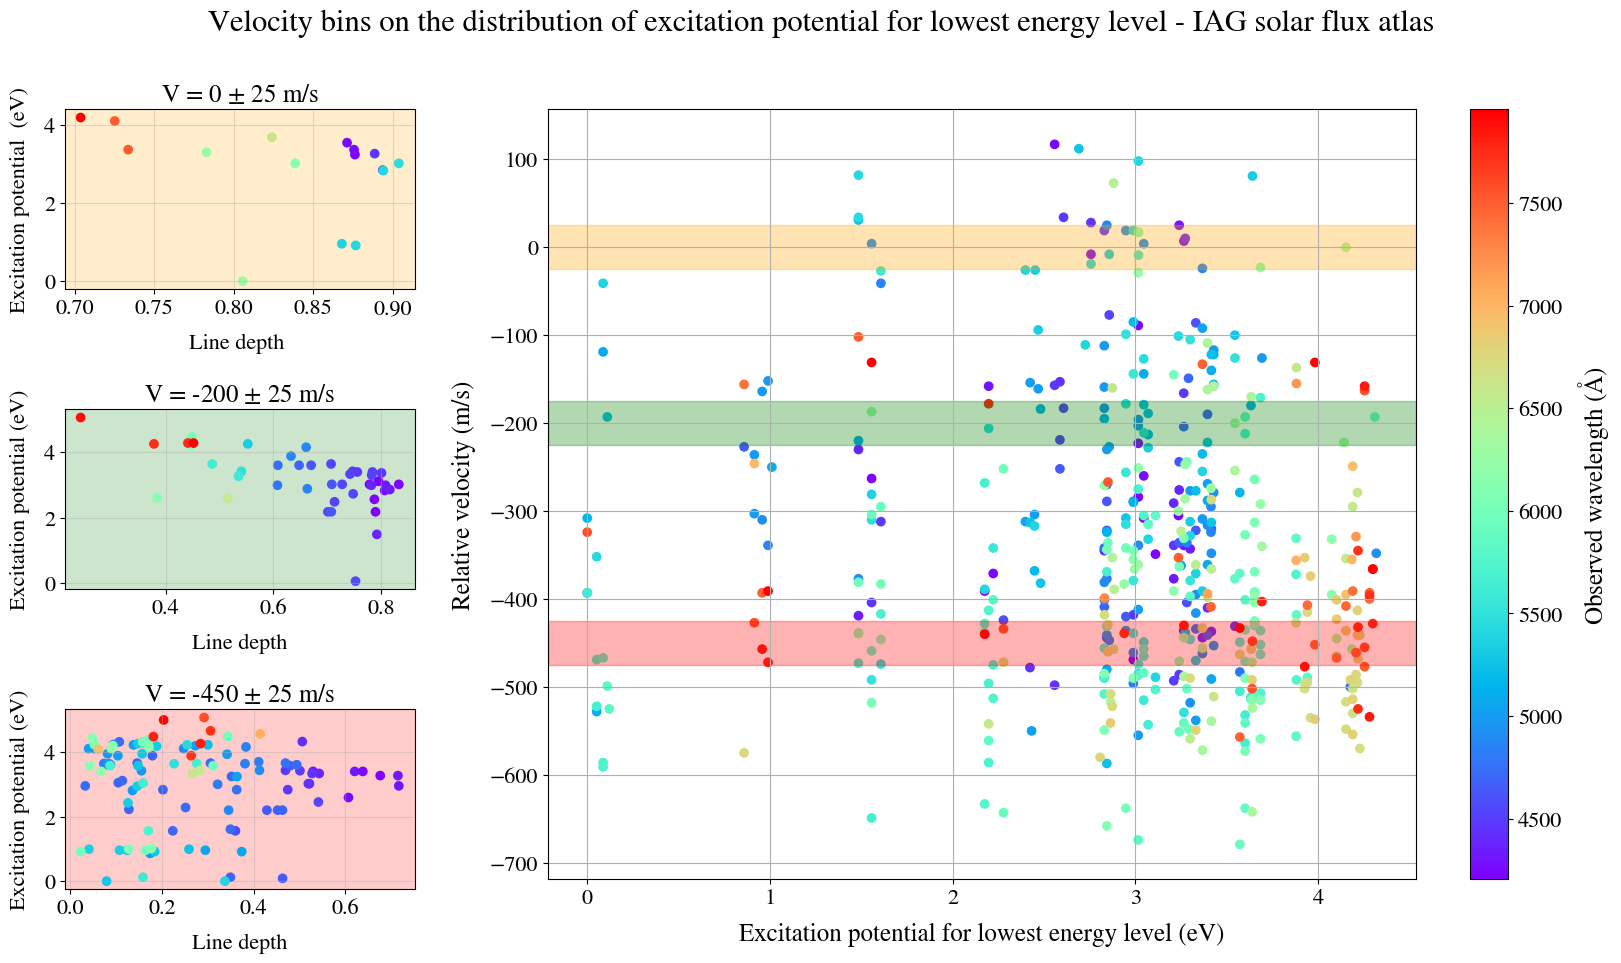

In [158]:
#Another form to graph
# Crear figura principal
fig3, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(Energy_data_VIS['Lower potential'],Energy_data_VIS['Velocity'],c=Energy_data_VIS['Wave A'],cmap='rainbow',lw=1)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10,fontsize=18)

fig3.suptitle('Velocity bins on the distribution of excitation potential for lowest energy level - IAG solar flux atlas',fontsize=22,x=0.32, y=0.98)
ax.set_xlabel(r'Excitation potential for lowest energy level (eV)',labelpad=10,fontsize=18)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10,fontsize=18)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig3.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig3.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig3.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=1
ax_inseti.scatter(velocity_VIS[i]['Line Depth'],velocity_VIS[i]['Lower potential'],c=velocity_VIS[i]["Wave A"],cmap='rainbow')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Excitation potential  (eV)',labelpad=10)
ax_inseti.set_xlabel(r'Line depth ',labelpad=10)
ax_inseti.grid(alpha=0.4)

j=5
ax_insetj.scatter(velocity_VIS[j]['Line Depth'],velocity_VIS[j]['Lower potential'],c=velocity_VIS[j]["Wave A"],cmap='rainbow')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Excitation potential (eV)',labelpad=10)
ax_insetj.set_xlabel(r'Line depth',labelpad=10)
ax_insetj.grid(alpha=0.4)

k=10
ax_insetk.scatter(velocity_VIS[k]['Line Depth'],velocity_VIS[k]['Lower potential'],c=velocity_VIS[k]["Wave A"],cmap='rainbow')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Excitation potential (eV)',labelpad=10)
ax_insetk.set_xlabel(r'Line depth',labelpad=10)
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.2))
ax_insetj.set_facecolor(color=('green', 0.2))
ax_insetk.set_facecolor(color=('red', 0.2))

# fig3.savefig('Velocity bins energy plot_VIS', bbox_inches='tight')

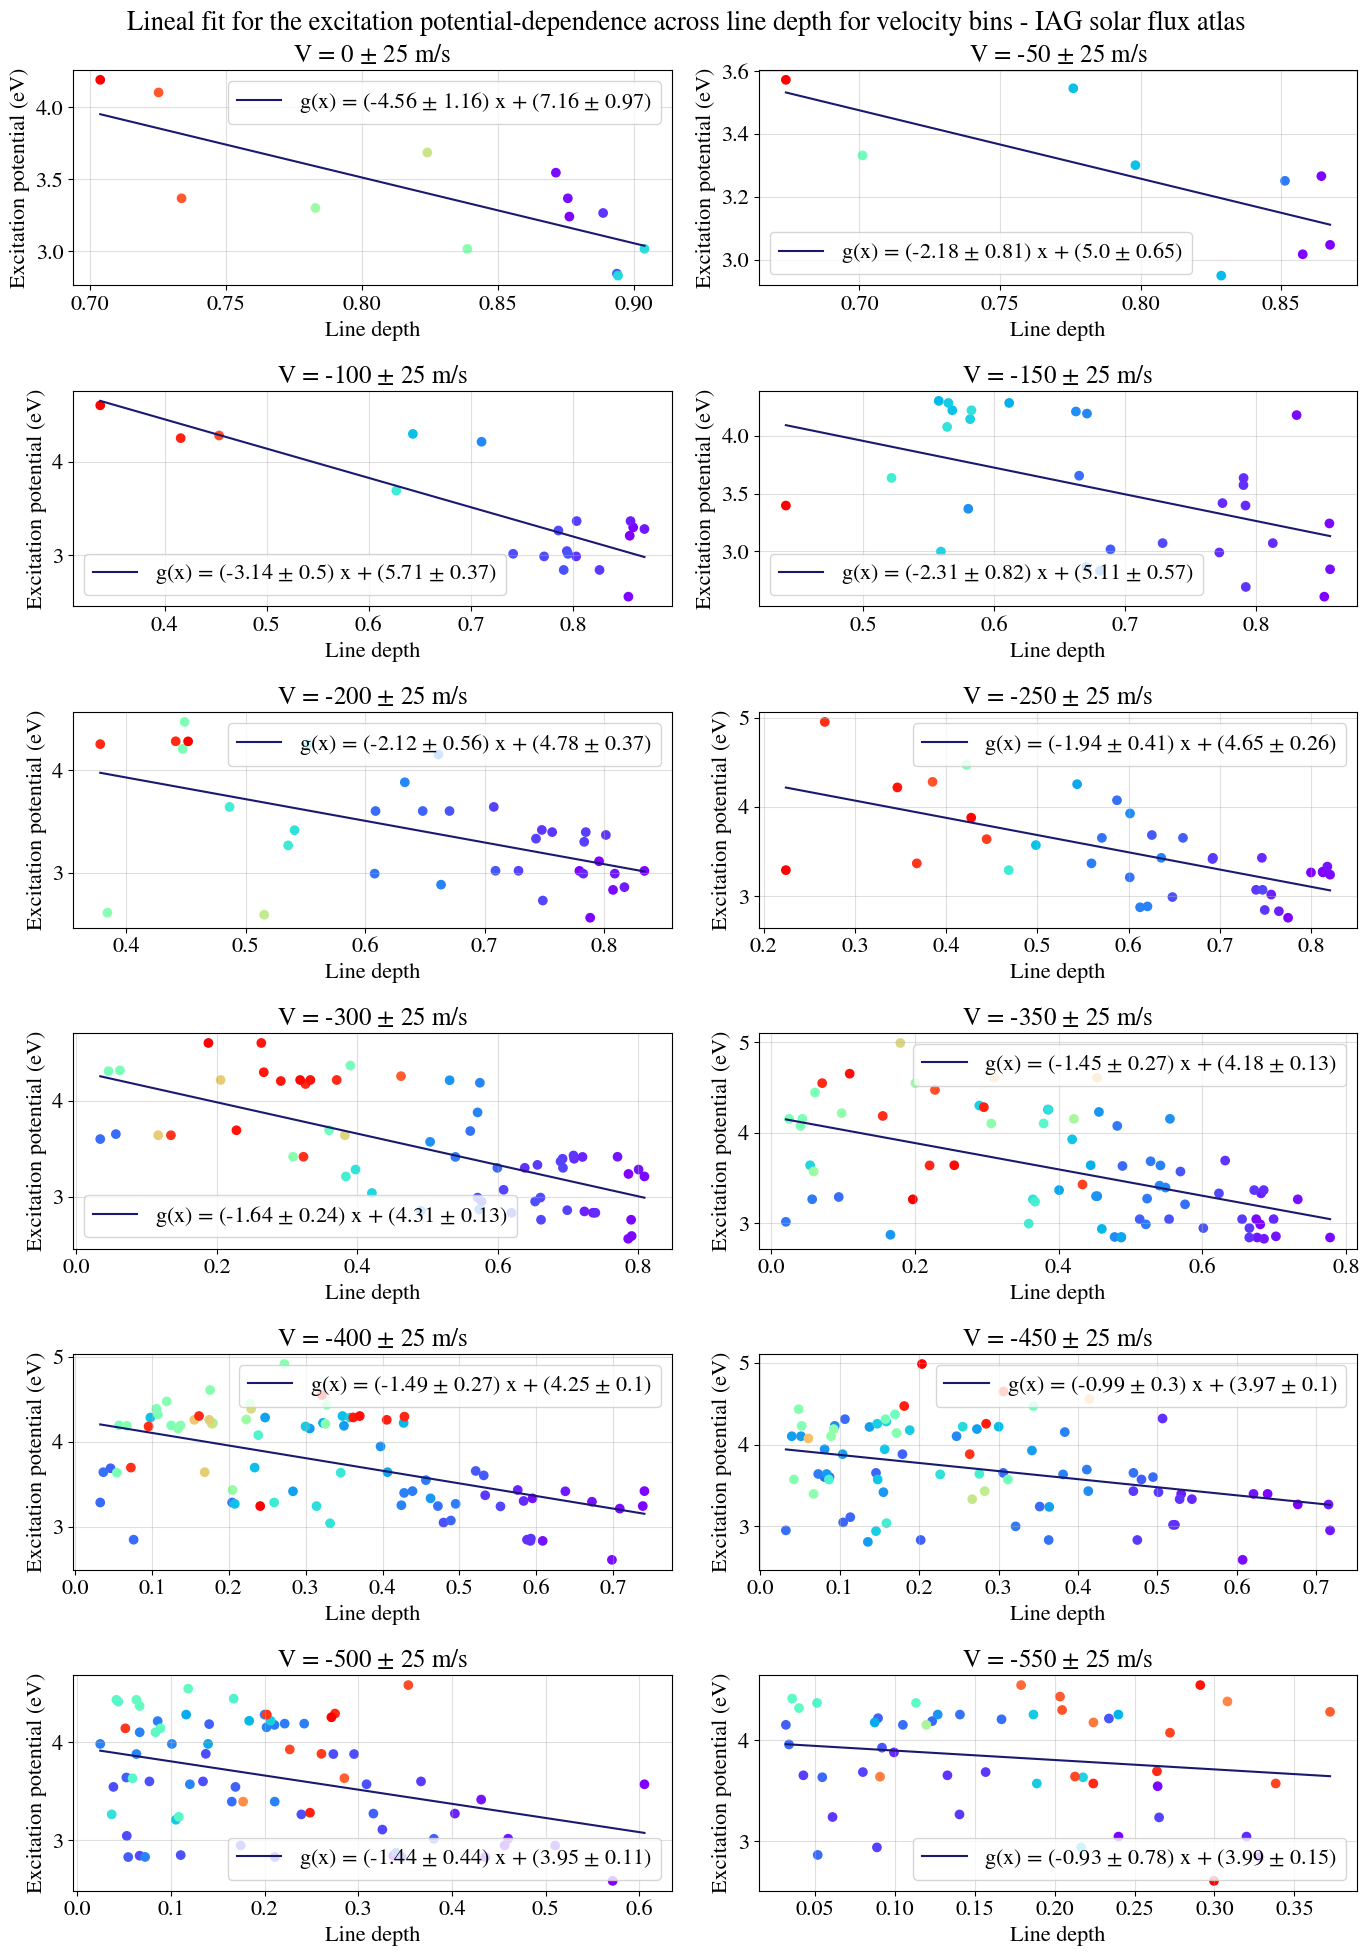

In [159]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []
cov_VIS = []
r_VIS = []

for i in range(1,13):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_VIS[i][velocity_VIS[i]['Lower potential'].between(2.5,5,inclusive='right')]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))
    #Calcule the pearson coeffcient where R2=r2
    r = new_data['Line Depth'].corr(pd.Series(fit, index=new_data.index))

    cov_VIS.append(pd.DataFrame(error))
    r_VIS.append(r**2)
    fits_VIS.append([values_fit,fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

markers_new = markers[1:13]

#Parameters and their error
param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
param_VIS.columns = ['Slope','Shift']
param_VIS['Error Slope'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[0]
param_VIS['Error Shift'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[1]

fig5, axes = plt.subplots(6, 2, figsize=(14, 20))
fig5.suptitle('Lineal fit for the excitation potential-dependence across line depth for velocity bins - IAG solar flux atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Line Depth'],wave_VIS[i]['Lower potential'],c=wave_VIS[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i],2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i],2)}) x + ({round(param_VIS["Shift"].iloc[i],2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth')
        ax.set_ylabel(r'Excitation potential (eV)')
        ax.grid(alpha=0.4)
        ax.legend()

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins energy VIS')


In [160]:
param_VIS

,Slope,Shift,Error Slope,Error Shift
0,-4.563852,7.163611,1.156457,0.965155
1,-2.178140,5.000523,0.806995,0.649571
2,-3.135595,5.711478,0.495852,0.369704
3,-2.310238,5.109898,0.820835,0.568826
4,-2.120386,4.778271,0.559491,0.374793
5,-1.936183,4.653389,0.412101,0.258801
6,-1.639993,4.314683,0.240862,0.131467
7,-1.453437,4.177869,0.269426,0.125133
8,-1.486354,4.251000,0.268332,0.103041
9,-0.991603,3.973436,0.297361,0.098262


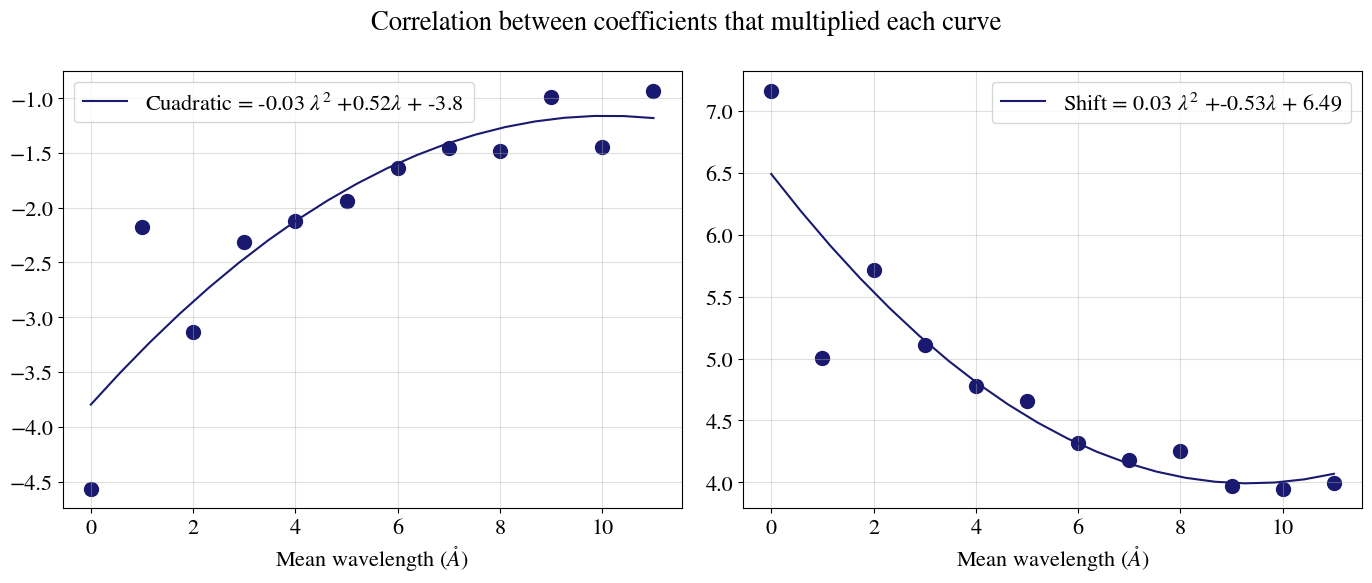

In [161]:
fig3, axes = plt.subplots(1,2,figsize=(14,6))
ax1 = axes[0]
ax3 = axes[1]

for i in range(len(param_VIS)):
    ax1.scatter(param_VIS.index[i],param_VIS['Slope'][i],marker='o',c='midnightblue',s=100)
    ax3.scatter(param_VIS.index[i],param_VIS['Shift'][i],marker='o',c='midnightblue',s=100)

#Made a polynomial first order fit
param0, cov = np.polyfit(param_VIS.index,param_VIS['Shift'], 2,cov=True)
values_fit = np.linspace(min(param_VIS.index), max(param_VIS.index), 20)
fit = np.polyval(param0,values_fit)

ax3.plot(values_fit,fit,c='midnightblue',label=rf'Shift = {round(param0[0],2)} $\lambda^2$ +{round(param0[1],2)}$\lambda$ + {round(param0[2],2)}')

# Made a polynomial first order fit
param2, cov = np.polyfit(param_VIS.index ,param_VIS['Slope'], 2,cov=True)
values_fit = np.linspace(min(param_VIS.index), max(param_VIS.index), 20)
fit = np.polyval(param2,values_fit)

ax1.plot(values_fit,fit,c='midnightblue',label=rf'Cuadratic = {round(param2[0],2)} $\lambda^2 $ +{round(param2[1],2)}$\lambda$ + {round(param2[2],2)} ')

fig3.suptitle('Correlation between coefficients that multiplied each curve')

ax1.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
ax3.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
# ax.set_ylabel(r'Coefficient')
ax1.grid(alpha = 0.4)
ax3.grid(alpha = 0.4)
ax1.legend()
ax3.legend()
fig3.tight_layout()

# fig3.savefig('color coeficients')

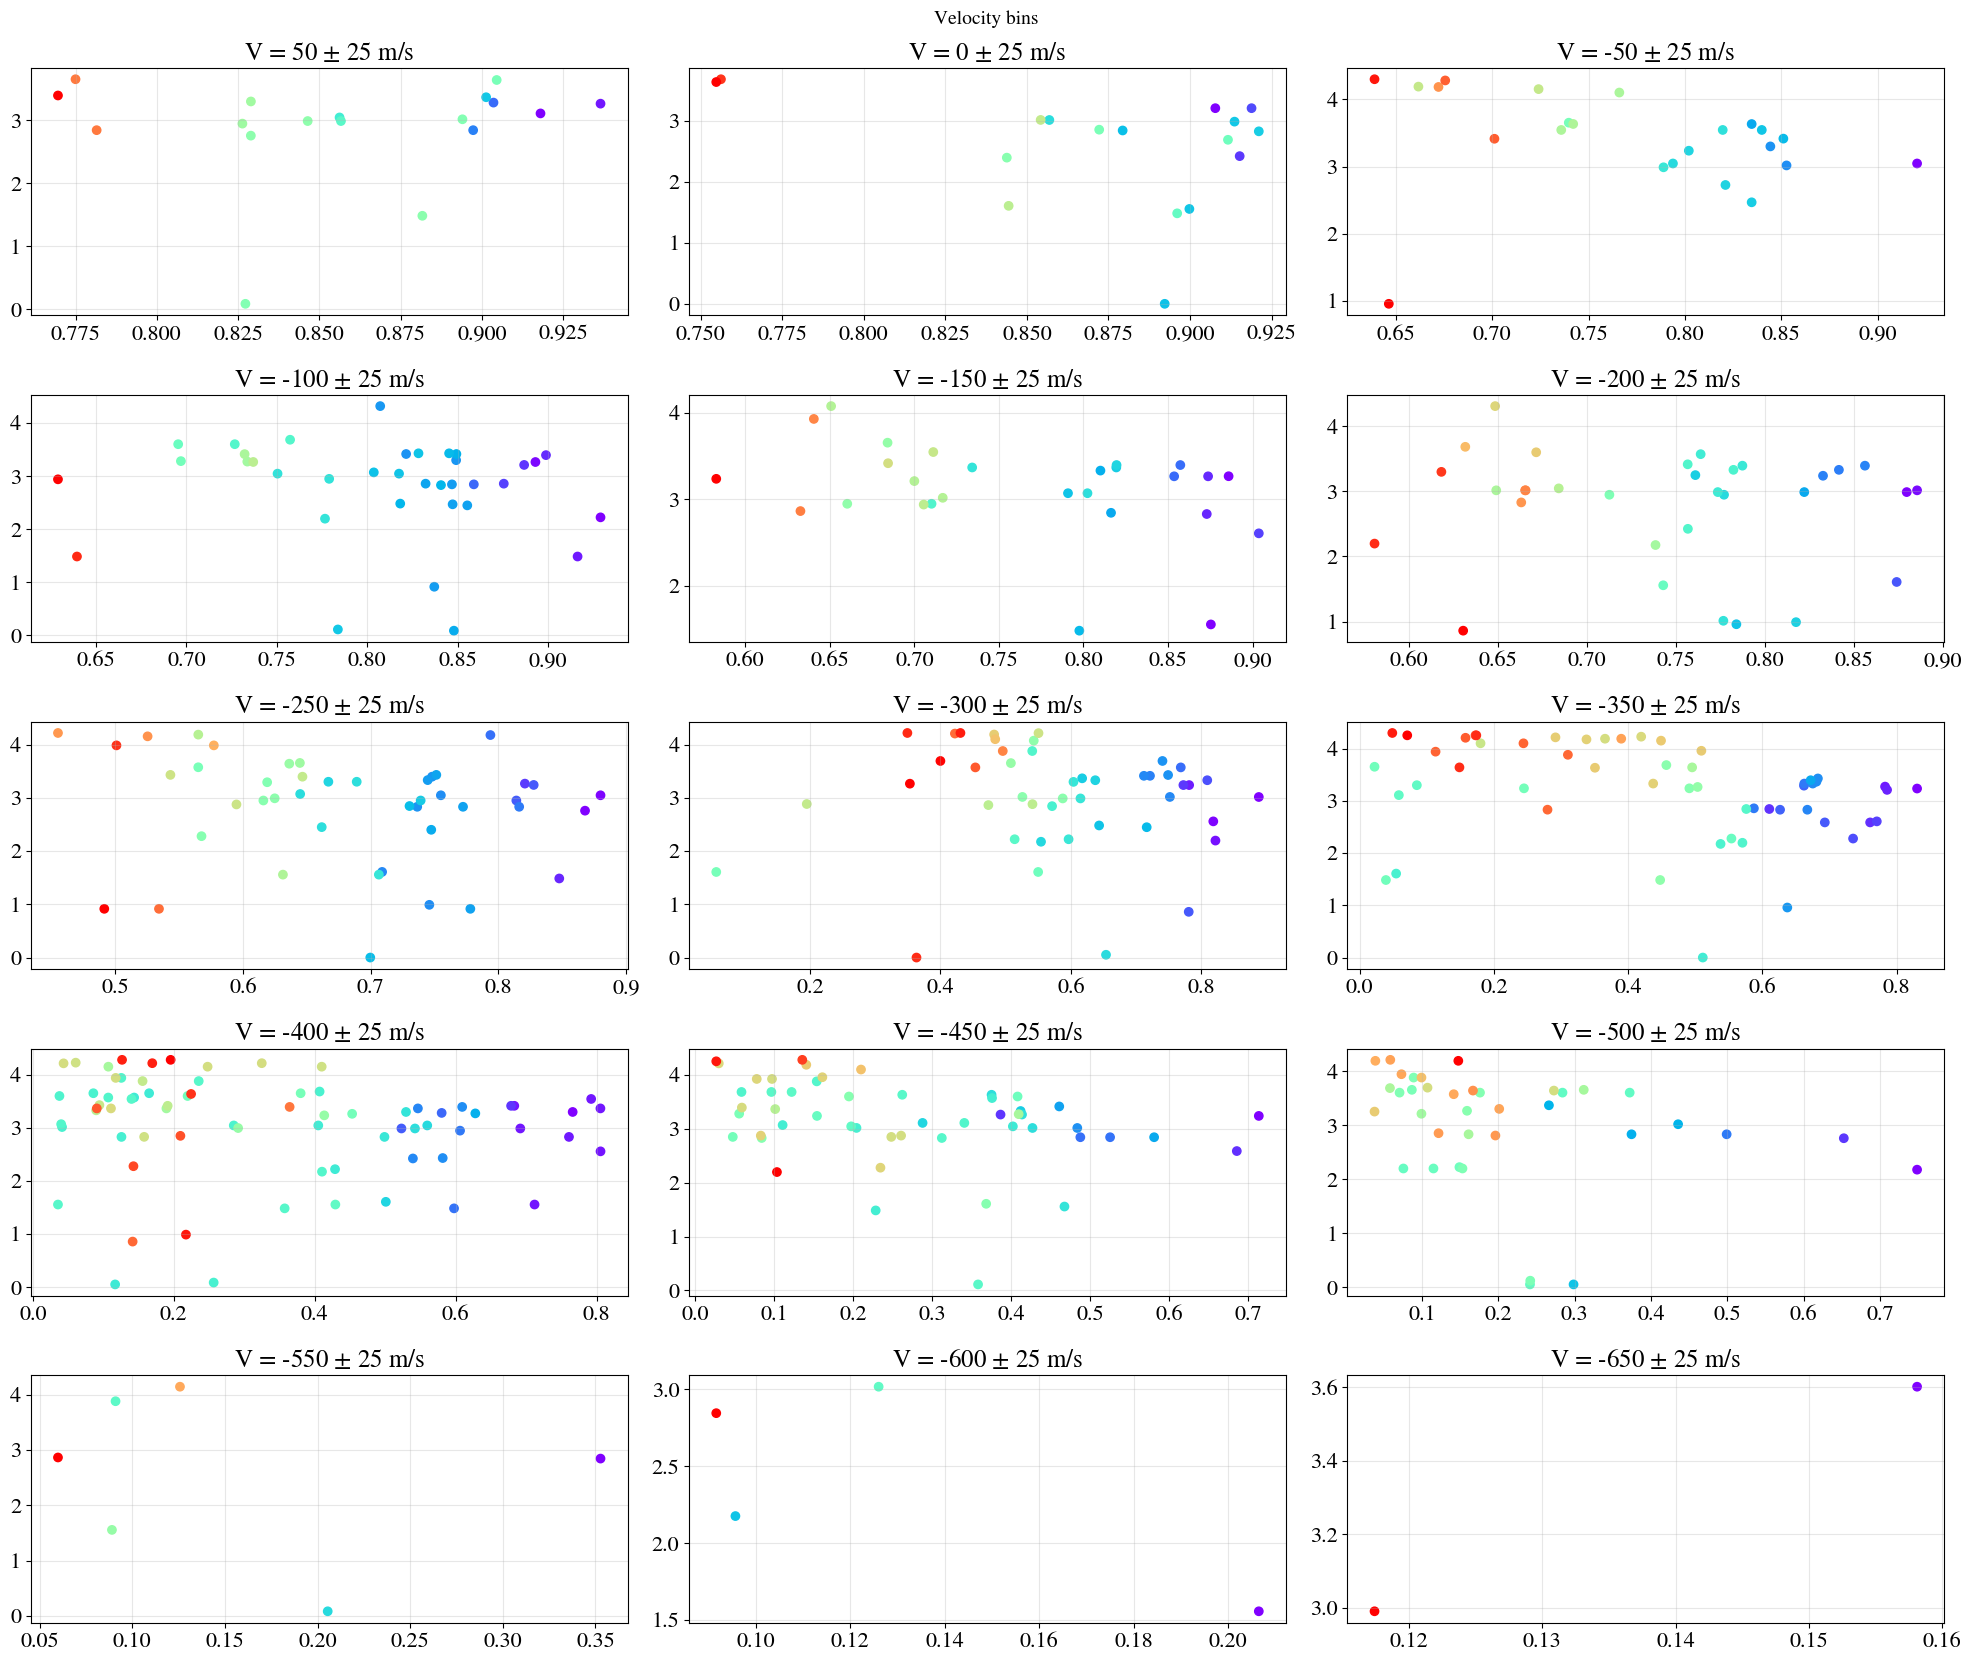

In [162]:
#Organize the dataframe wtih ascending velocities
listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(Energy_data_SPA[Energy_data_SPA['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Line Depth'],velocity_SPA[i]['Lower potential'],c=velocity_SPA[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

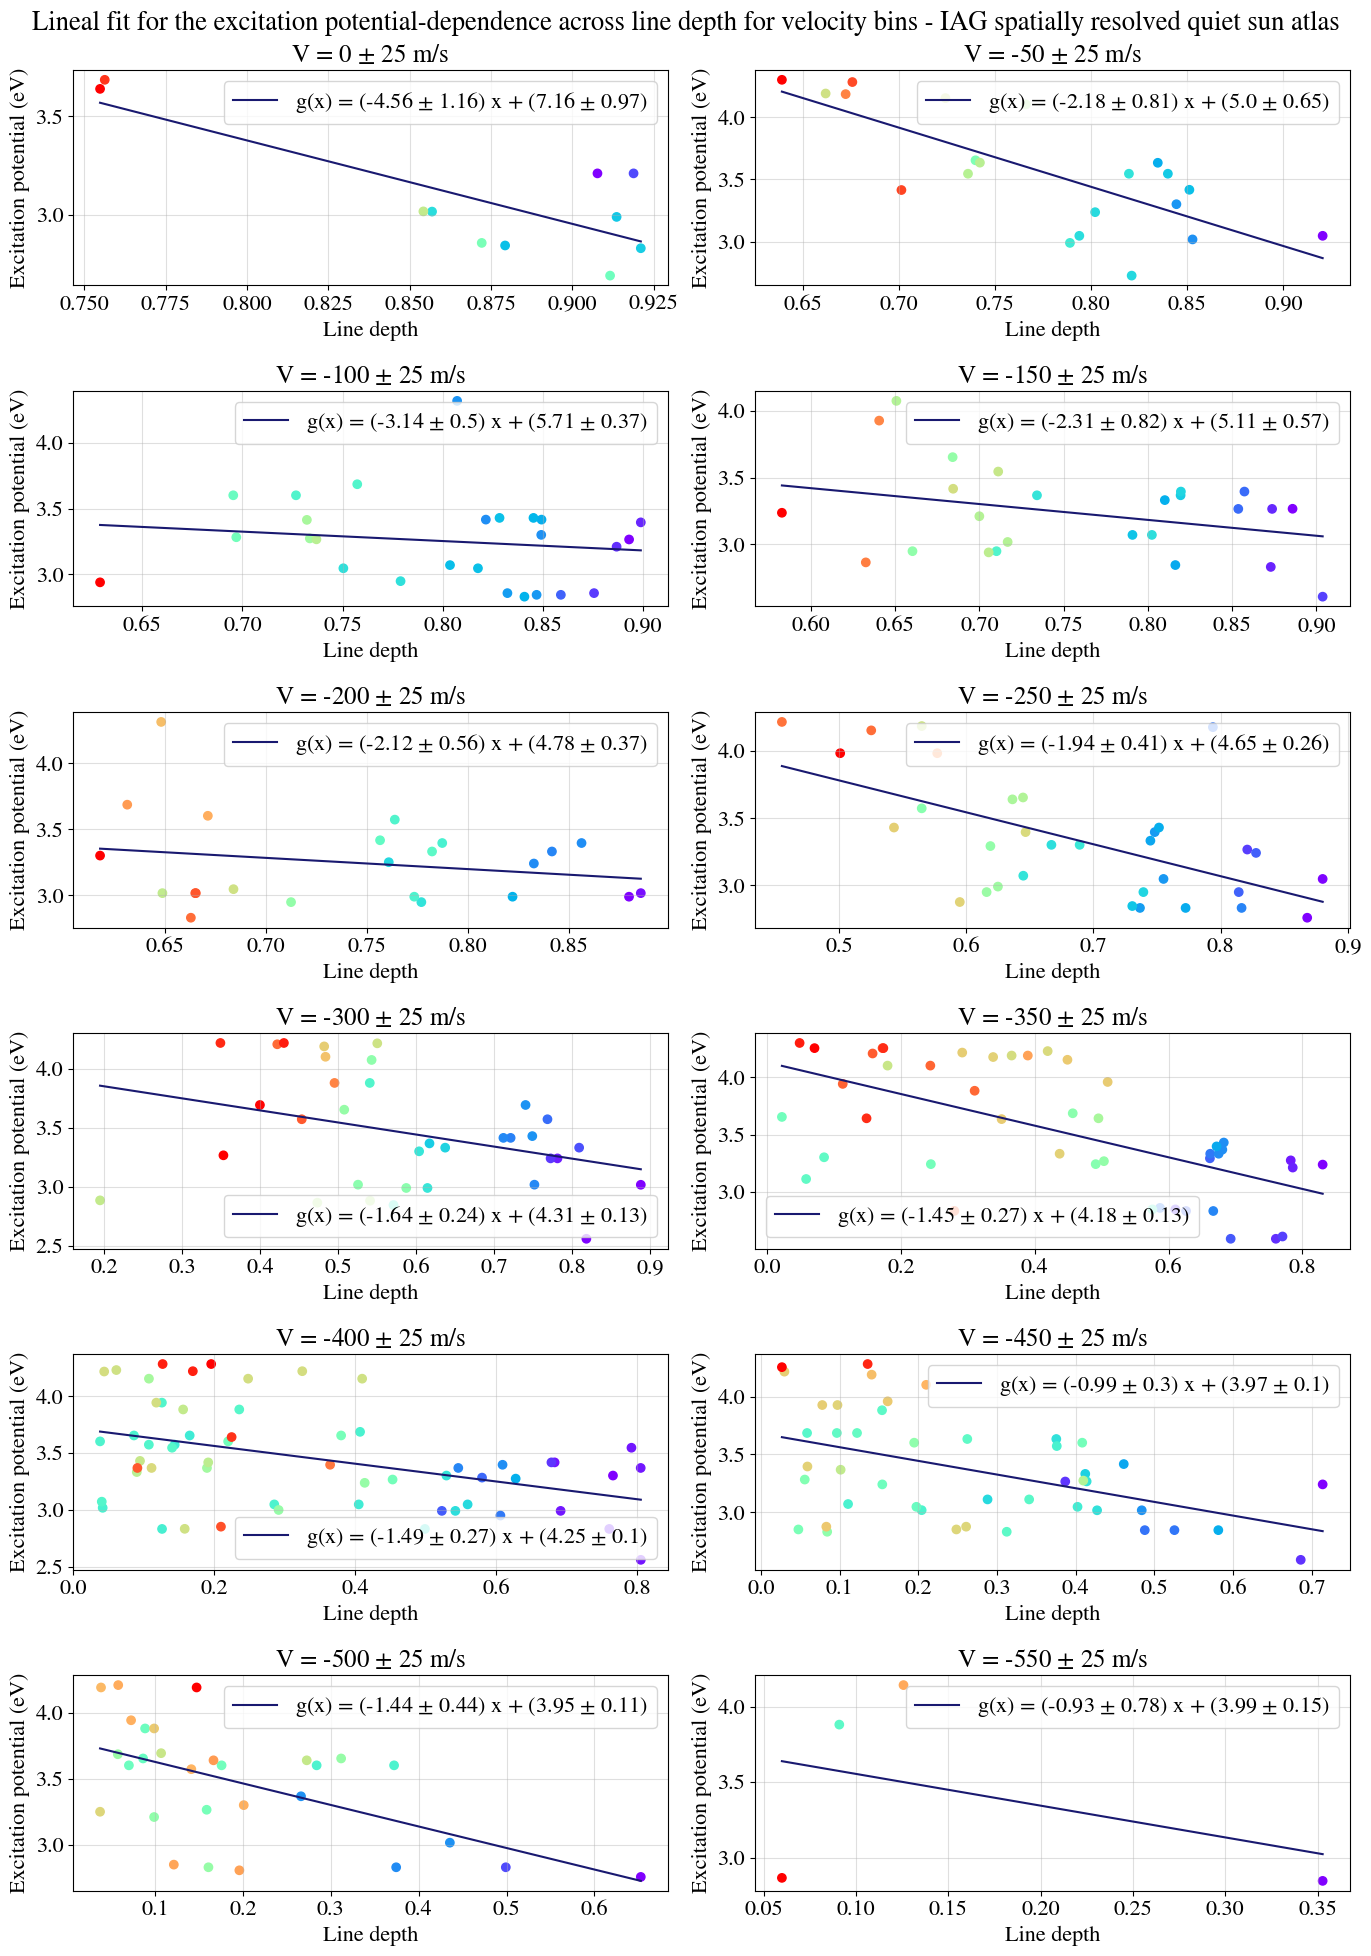

In [163]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []
r_SPA = []

for i in range(1,13):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_SPA[i][velocity_SPA[i]['Lower potential'].between(2.5,5,inclusive='right')]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))
    #Calcule the pearson coeffcient where R2=r2
    r = new_data['Line Depth'].corr(pd.Series(fit, index=new_data.index))

    cov_SPA.append(pd.DataFrame(error))
    r_SPA.append(r**2)
    fits_SPA.append([values_fit,fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

markers_new = markers[1:13]

#Parameters and their error
param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
param_SPA.columns = ['Slope','Shift']
param_SPA['Error Slope'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[0]
param_SPA['Error Shift'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[1]

fig5, axes = plt.subplots(6, 2, figsize=(14, 20))
fig5.suptitle('Lineal fit for the excitation potential-dependence across line depth for velocity bins - IAG spatially resolved quiet sun atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Line Depth'],wave_SPA[i]['Lower potential'],c=wave_SPA[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i],2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i],2)}) x + ({round(param_VIS["Shift"].iloc[i],2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth')
        ax.set_ylabel(r'Excitation potential (eV)')
        ax.grid(alpha=0.4)
        ax.legend()

fig5.tight_layout()


# fig5.savefig('Velocity bins energy SPA')


In [164]:
param_VIS

,Slope,Shift,Error Slope,Error Shift
0,-4.563852,7.163611,1.156457,0.965155
1,-2.178140,5.000523,0.806995,0.649571
2,-3.135595,5.711478,0.495852,0.369704
3,-2.310238,5.109898,0.820835,0.568826
4,-2.120386,4.778271,0.559491,0.374793
5,-1.936183,4.653389,0.412101,0.258801
6,-1.639993,4.314683,0.240862,0.131467
7,-1.453437,4.177869,0.269426,0.125133
8,-1.486354,4.251000,0.268332,0.103041
9,-0.991603,3.973436,0.297361,0.098262


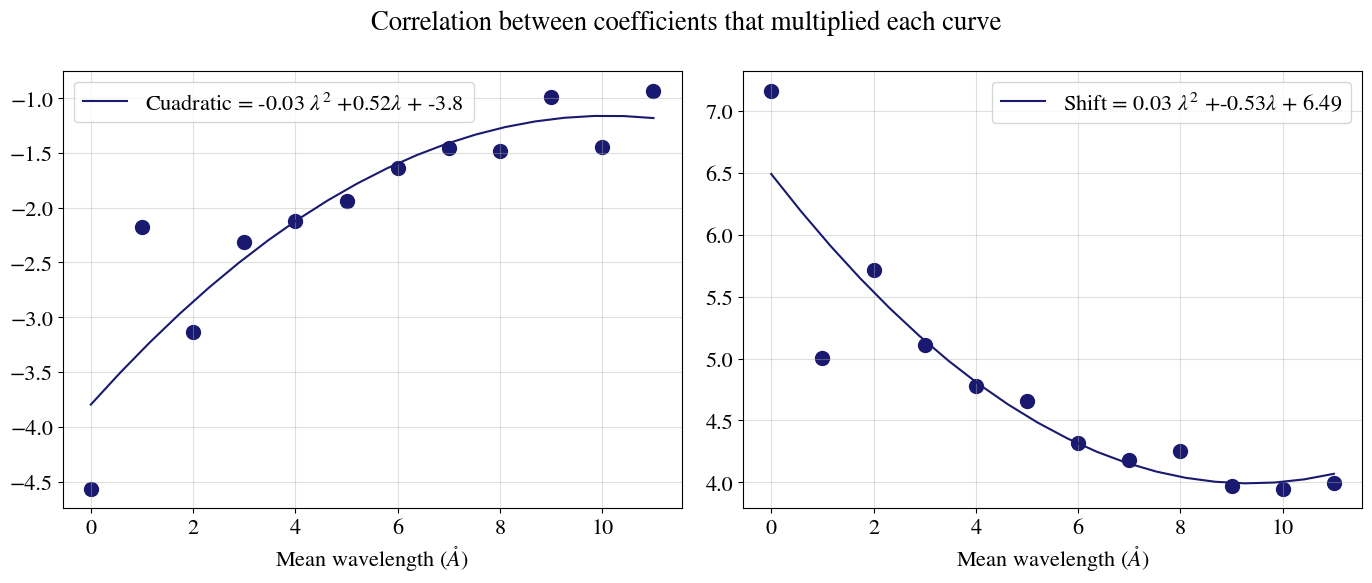

In [165]:
fig3, axes = plt.subplots(1,2,figsize=(14,6))
ax1 = axes[0]
ax3 = axes[1]

for i in range(len(param_VIS)):
    ax1.scatter(param_VIS.index[i],param_VIS['Slope'][i],marker='o',c='midnightblue',s=100)
    ax3.scatter(param_VIS.index[i],param_VIS['Shift'][i],marker='o',c='midnightblue',s=100)

#Made a polynomial first order fit
param0, cov = np.polyfit(param_VIS.index,param_VIS['Shift'], 2,cov=True)
values_fit = np.linspace(min(param_VIS.index), max(param_VIS.index), 20)
fit = np.polyval(param0,values_fit)

ax3.plot(values_fit,fit,c='midnightblue',label=rf'Shift = {round(param0[0],2)} $\lambda^2$ +{round(param0[1],2)}$\lambda$ + {round(param0[2],2)}')

# Made a polynomial first order fit
param2, cov = np.polyfit(param_VIS.index ,param_VIS['Slope'], 2,cov=True)
values_fit = np.linspace(min(param_VIS.index), max(param_VIS.index), 20)
fit = np.polyval(param2,values_fit)

ax1.plot(values_fit,fit,c='midnightblue',label=rf'Cuadratic = {round(param2[0],2)} $\lambda^2 $ +{round(param2[1],2)}$\lambda$ + {round(param2[2],2)} ')

fig3.suptitle('Correlation between coefficients that multiplied each curve')

ax1.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
ax3.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
# ax.set_ylabel(r'Coefficient')
ax1.grid(alpha = 0.4)
ax3.grid(alpha = 0.4)
ax1.legend()
ax3.legend()
fig3.tight_layout()

# fig3.savefig('color coeficients')

In [166]:
param2

array([-0.02585287,  0.52215779, -3.79753763])